<a href="https://colab.research.google.com/github/andreadityam/customer-purchases-behavior-eda/blob/main/Customer_Purchases_Behavior_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset ini merupakan data simulasi yang menggambarkan perilaku pembelian pelanggan. Terdiri dari 100.000 baris dan 12 kolom, mencakup informasi seperti usia, jenis kelamin, pendapatan, pendidikan, wilayah, status loyalitas, frekuensi dan jumlah pembelian, kategori produk, penggunaan promosi, serta skor kepuasan pelanggan.

# IMPORT DATASET

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sanyamgoyal401/customer-purchases-behaviour-dataset --unzip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset
License(s): apache-2.0


# LOAD DATASET

In [ ]:
import pandas as pd
df = pd.read_csv("customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


# CHECK DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [ ]:
print(df.dtypes)

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object


In [ ]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


# EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**MISSING and DUPLICATE VALUE**

In [ ]:
duplikasi = df[df.duplicated()]

print("\nData yang Terduplikasi:")
print(duplikasi)


Data yang Terduplikasi:
Empty DataFrame
Columns: [id, age, gender, income, education, region, loyalty_status, purchase_frequency, purchase_amount, product_category, promotion_usage, satisfaction_score]
Index: []


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
education,0
region,0
loyalty_status,0
purchase_frequency,0
purchase_amount,0
product_category,0


**UNIVARIATE ANALYSIS**

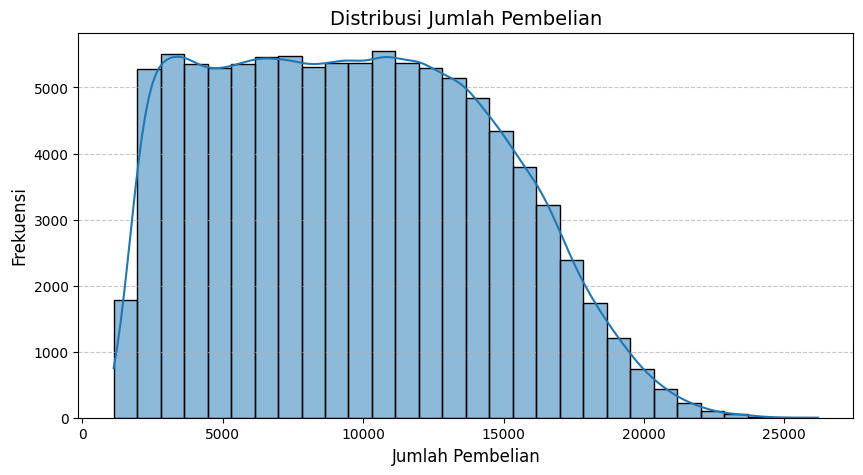

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["purchase_amount"], bins=30, kde=True)
plt.title("Distribusi Jumlah Pembelian", fontsize=14)
plt.xlabel("Jumlah Pembelian", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

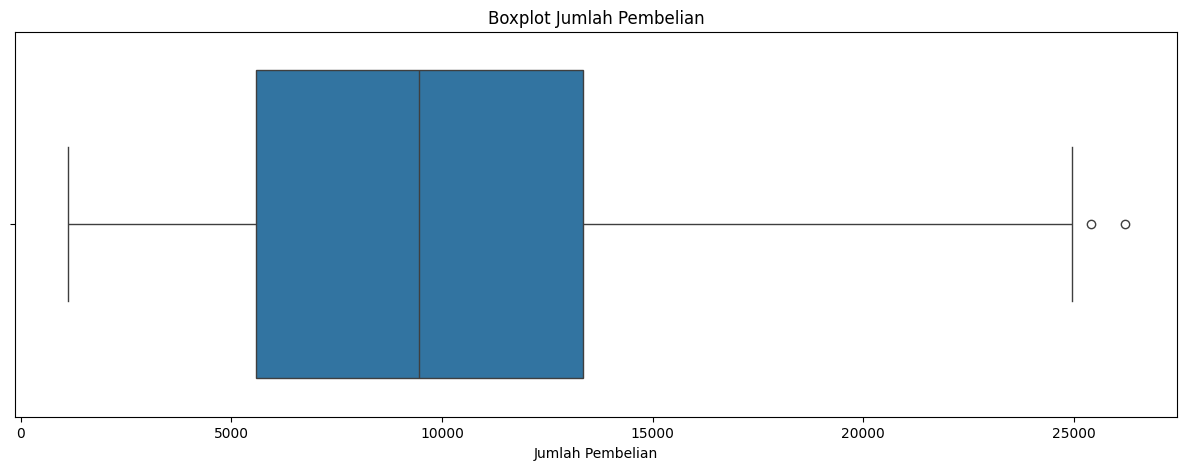

Q1 (Kuartil 1)  : 5583.0
Q2 (Median)     : 9452.0
Q3 (Kuartil 3)  : 13350.0
IQR             : 7767.0
Min (Minimum)   : 1118
Max (Maksimum)  : 26204


In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df["purchase_amount"])
plt.title("Boxplot Jumlah Pembelian")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Jumlah Pembelian")
plt.show()

Q1 = df["purchase_amount"].quantile(0.25)
Q2 = df["purchase_amount"].median()
Q3 = df["purchase_amount"].quantile(0.75)
IQR = Q3 - Q1
min_val = df["purchase_amount"].min()
max_val = df["purchase_amount"].max()

print(f"Q1 (Kuartil 1)  : {Q1}")
print(f"Q2 (Median)     : {Q2}")
print(f"Q3 (Kuartil 3)  : {Q3}")
print(f"IQR             : {IQR}")
print(f"Min (Minimum)   : {min_val}")
print(f"Max (Maksimum)  : {max_val}")

**MULTIVARIATE ANALYSIS**

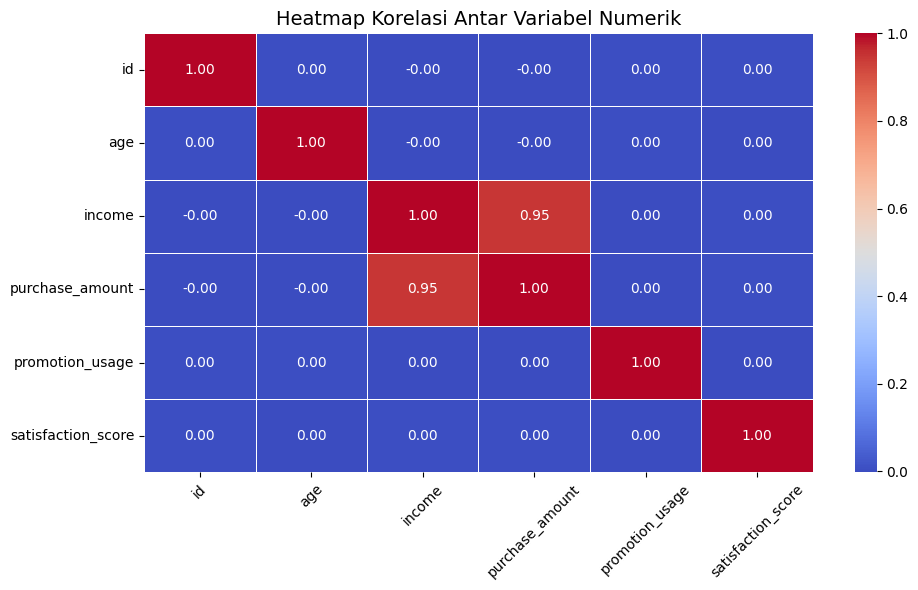

In [ ]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df = numeric_df.dropna()
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

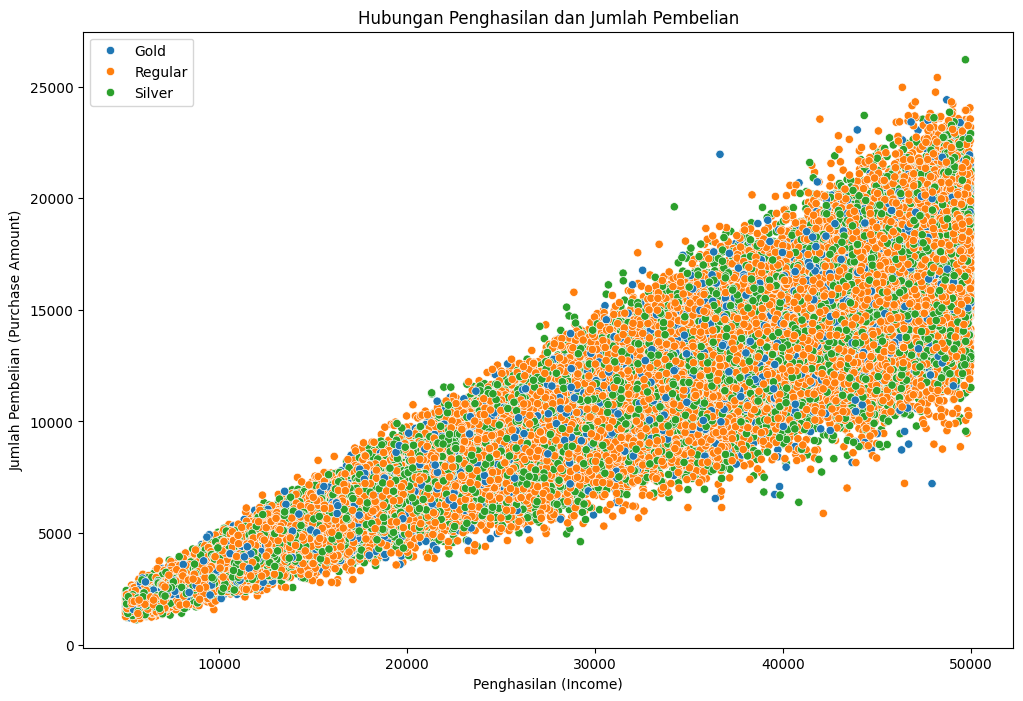

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="income", y="purchase_amount", hue="loyalty_status")
plt.title("Hubungan Penghasilan dan Jumlah Pembelian")
plt.xlabel("Penghasilan (Income)")
plt.ylabel("Jumlah Pembelian (Purchase Amount)")
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<ipython-input-20-ebeefbf0e917>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


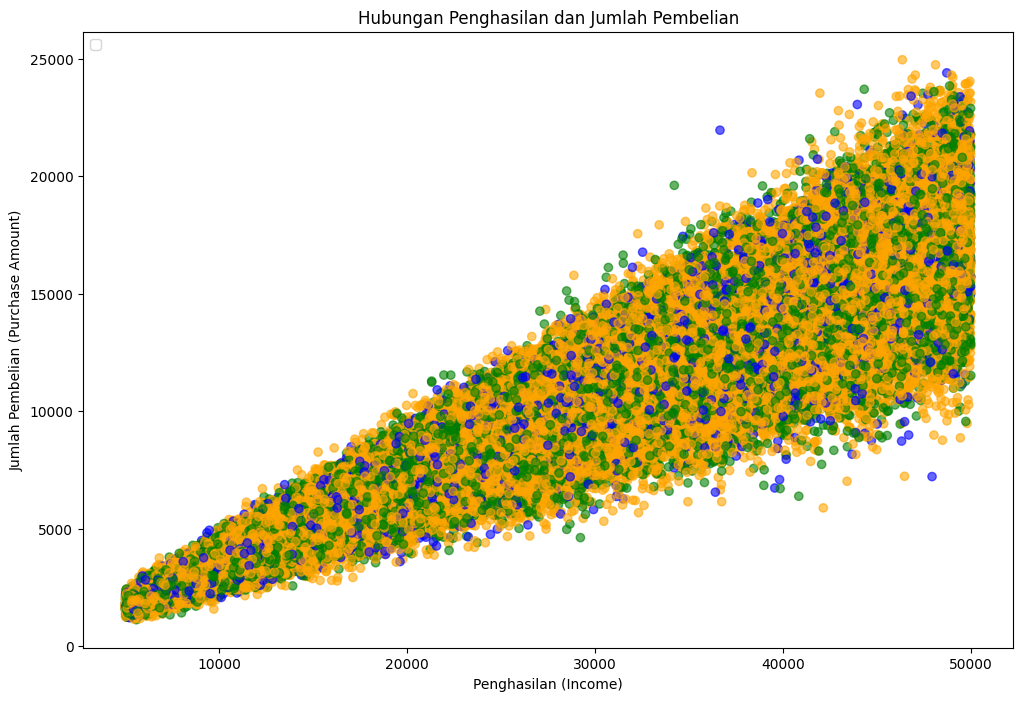

In [ ]:
Q1_income = df["income"].quantile(0.25)
Q3_income = df["income"].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_purchase = df["purchase_amount"].quantile(0.25)
Q3_purchase = df["purchase_amount"].quantile(0.75)
IQR_purchase = Q3_purchase - Q1_purchase

df_filtered = df[
    (df["income"] >= (Q1_income - 1.5 * IQR_income)) & (df["income"] <= (Q3_income + 1.5 * IQR_income)) &
    (df["purchase_amount"] >= (Q1_purchase - 1.5 * IQR_purchase)) & (df["purchase_amount"] <= (Q3_purchase + 1.5 * IQR_purchase))
]

plt.figure(figsize=(12,8))
plt.scatter(df_filtered['income'], df_filtered['purchase_amount'], c=df_filtered['loyalty_status'].apply(lambda x: colors[x]), alpha=0.6)
plt.title("Hubungan Penghasilan dan Jumlah Pembelian")
plt.xlabel("Penghasilan (Income)")
plt.ylabel("Jumlah Pembelian (Purchase Amount)")
plt.legend(loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**CATEGORICAL ANALYSIS**

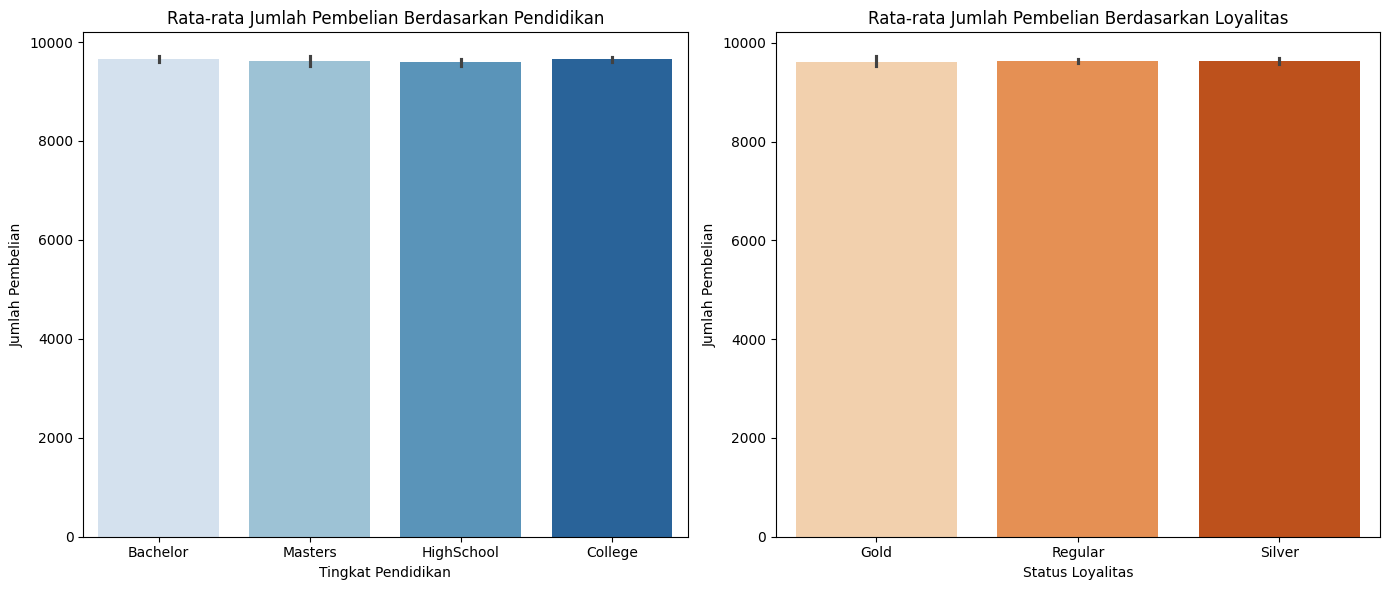

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df, x="education", y="purchase_amount", estimator=np.mean,
            hue="education", palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("Rata-rata Jumlah Pembelian Berdasarkan Pendidikan")
axes[0].set_xlabel("Tingkat Pendidikan")
axes[0].set_ylabel("Jumlah Pembelian")

sns.barplot(data=df, x="loyalty_status", y="purchase_amount", estimator=np.mean,
            hue="loyalty_status", palette="Oranges", legend=False, ax=axes[1])
axes[1].set_title("Rata-rata Jumlah Pembelian Berdasarkan Loyalitas")
axes[1].set_xlabel("Status Loyalitas")
axes[1].set_ylabel("Jumlah Pembelian")

plt.tight_layout()
plt.show()

100%|██████████| 1.45M/1.45M [00:00<00:00, 95.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset/versions/1


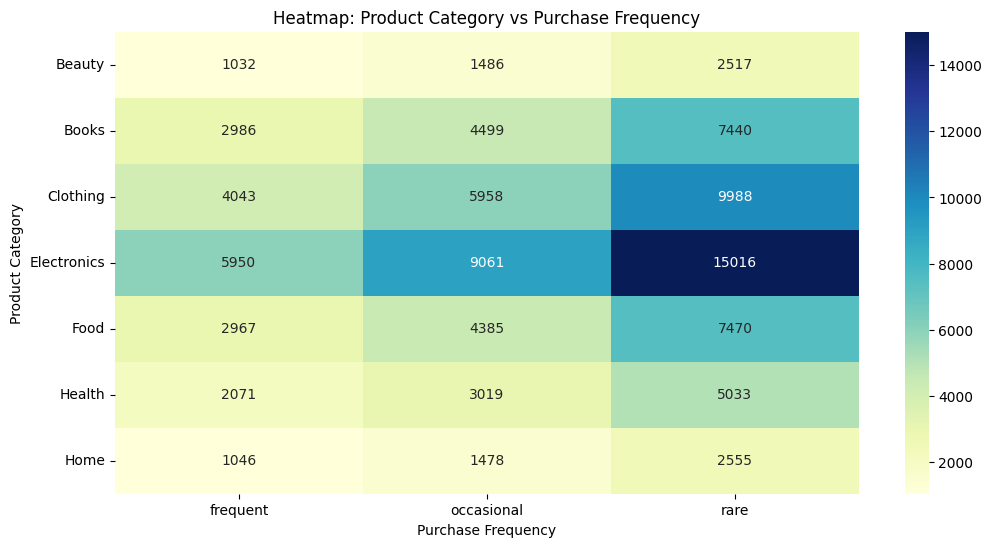

In [ ]:
import kagglehub
path = kagglehub.dataset_download("sanyamgoyal401/customer-purchases-behaviour-dataset")

print("Path to dataset files:", path)
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(os.path.join(path, 'customer_data.csv'))
cross_tab = pd.crosstab(df['product_category'], df['purchase_frequency'])

plt.figure(figsize=(12,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Product Category vs Purchase Frequency')
plt.ylabel('Product Category')
plt.xlabel('Purchase Frequency')
plt.show()